# Welcome to Colab!

####Problem Statement

The company operates across multiple regions, sales channels, warehouses, and product categories,
but lacks data-driven insights into what factors drive sales performance and profitability.
Without a clear understanding of regional demand patterns, channel effectiveness, and cost efficiency,
decision-makers are unable to optimize pricing, inventory distribution, and sales strategy.
This project aims to analyze historical sales data to identify key drivers of revenue and profit,
uncover regional and channel-level performance differences, and provide actionable insights to
improve overall sales efficiency.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [ ]:
#Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

df_sales.head(5)

In [ ]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
#Rectifying the heaader of the regional sales since it has a problem

new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


Check null values

In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


Data Cleaning and Data wrangling

In [ ]:
#Merge with Customers

df = df_sales.merge(
    df_customers,
how  = 'left',
left_on = 'Customer Name Index',
right_on = 'Customer Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
#Merge with Products

df = df.merge(
    df_products,
how  = 'left',
left_on = 'Product Description Index',
right_on = 'Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
#Merge with Regions

df = df.merge(
    df_regions,
how  = 'left',
left_on = 'Delivery Region Index',
right_on = 'id'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
#Merge with State Regions

df = df.merge(
    df_state_reg[["State Code", "Region"]],
how  = 'left',
left_on = 'state_code',
right_on = 'State Code'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
#Merge with 2017 Budget

df = df.merge(
    df_budgets,
how  = 'left',
on = 'Product Name',
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
#Writing the final one then downloading the 33 columns

df.to_csv('file.csv')

In [ ]:
#Clean Up Redundant Columns first

#Customer Index
#Index
#id
#State Code

cols_to_drop = ['Customer Index','Index','id','State Code']
df=df.drop(columns=cols_to_drop,errors='ignore')


df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
#Convert all coolumns to lowercase for ease of use and consistency

df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [ ]:
df = df[cols_to_keep]

In [ ]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
#Rename the columns

df = df.rename (columns={
    'ordernumber': 'order_number',
    'orderdate' : 'order_date',
    'customer names': 'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total_unit_cost':'cost',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'lon',
    '2017 budgets':'budget'
}
                )

In [ ]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
#Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year!=2017,'budget']=pd.NA

df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [ ]:
df[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [ ]:
#Filter the dataset to include only records from year 2017
df_2017=df[df['order_date'].dt.year==2017]

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of        order_number  order_date  customer_name  channel  product_name  \
0             False       False          False    False         False   
1             False       False          False    False         False   
2             False       False          False    False         False   
3             False       False          False    False         False   
4             False       False          False    False         False   
...             ...         ...            ...      ...           ...   
64099         False       False          False    False         False   
64100         False       False          False    False         False   
64101         False       False          False    False         False   
64102         False       False          False    False         False   
64103         False       False          False    False         False   

       order_quantity  unit_price  revenue  total unit cost  state  county  \
0               False       False    False            False  False   False   
1               False       False    False            False  False   False   
2               False       False    False            False  False   False   
3               False       False    False            False  False   False   
4               False       False    False            False  False   False   
...               ...         ...      ...              ...    ...     ...   
64099           False       False    False            False  False   False   
64100           False       False    False            False  False   False   
64101           False       False    False            False  False   False   
64102           False       False    False            False  False   False   
64103           False       False    False            False  False   False   

       state_name  region    lat    lon  budget  
0           False   False  False  False    True  
1           False   False  False  False    True  
2           False   False  False  False    True  
3           False   False  False  False    True  
4           False   False  False  False    True  
...           ...     ...    ...    ...     ...  
64099       False   False  False  False    True  
64100       False   False  False  False    True  
64101       False   False  False  False    True  
64102       False   False  False  False    True  
64103       False   False  False  False    True  

[64104 rows x 16 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [ ]:
#Filter the dataset to include only records from year 2017
df_2017=df[df['order_date'].dt.year==2017]

In [ ]:
df.to_csv('final.csv')

Feature Engineering

In [ ]:
df['total_cost']=df['order_quantity']*df['total unit cost']

In [ ]:
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_pct']=df['profit']/df['revenue']*100

In [ ]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


Explaratory Data Analysis (EDA)

In [ ]:
#Remove some incomplete records first from the first two months of 2018
df = df[~(
    (df['order_date'].dt.year == 2018) &
    (df['order_date'].dt.month.isin([1, 2]))
)]

In [ ]:
#An year month column for aggregation
df['year_month'] = df['order_date'].dt.to_period('M')

In [ ]:
#Aggregate monthly sales(revenue)
monthly_sales = (
    df.groupby('year_month', as_index=False)['revenue']
    .sum()
)

# Convert Period to Timestamp for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

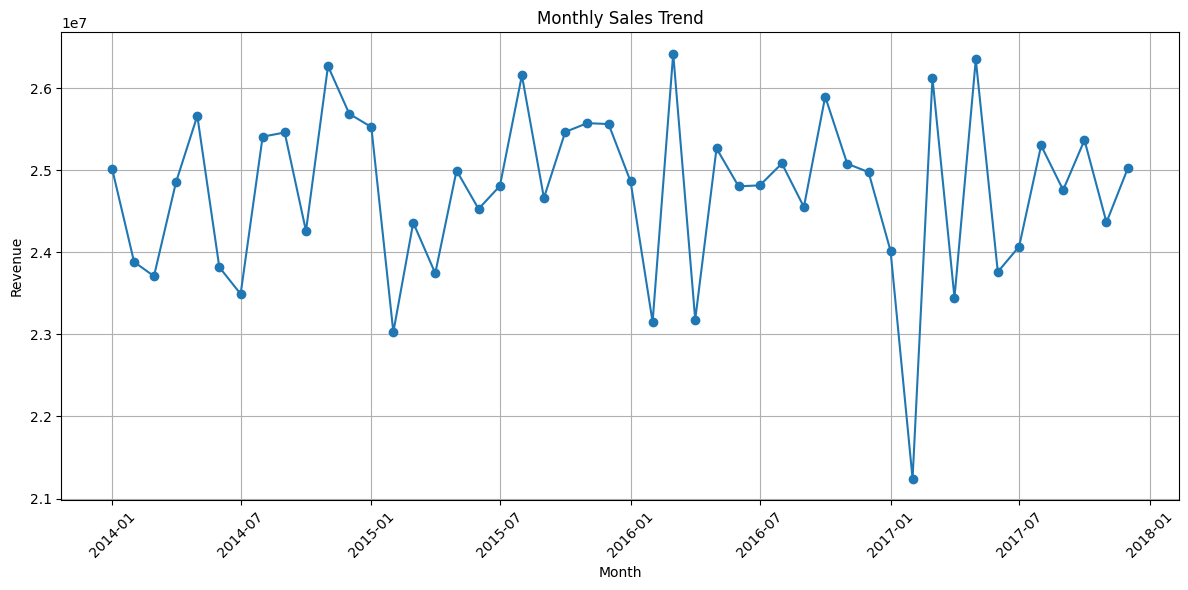

In [ ]:
#Plot the monthly sales line chart - visualizes revenue trends to identify seasonality and performance patterns.
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['revenue'], marker='o')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Insights of the monthly sales trend**

- There is an upward trend in revenue over time supported by recurring seasonal patterns characterized by stronger performance towards the end of each year and slower activities towards the beginning of the year'
- While short term fluctuactions exist, sales behaviour remains stable and predictable.
- There were incomplete records in early 2018, which were excluded to ensure accurate trend interpretation.
- In summary, the chart confirms both growth and seasonality in regional sales performance.

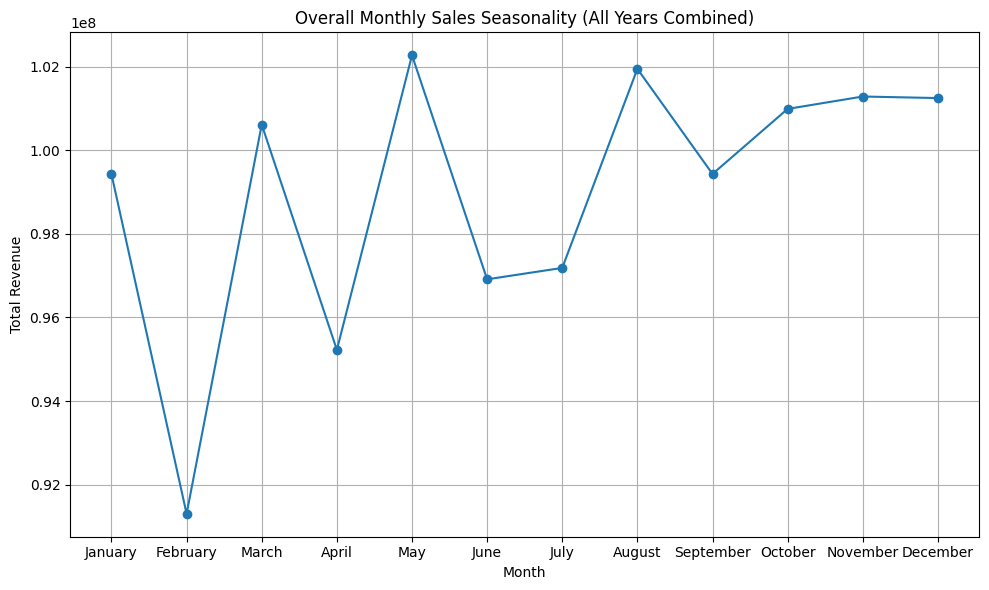

In [ ]:
#To analyze seasonality, I want to aggregate sales across all years by calendar month.
#This will help isolate recurring monthly patterns and identify periods of consistently high or low demand

# Remove records from January and February 2018
df_clean = df[~(
    (df['order_date'].dt.year == 2018) &
    (df['order_date'].dt.month.isin([1, 2]))
)]

# Extract calendar month
df_clean['month'] = df_clean['order_date'].dt.month
df_clean['month_name'] = df_clean['order_date'].dt.month_name()

# Aggregate revenue across ALL years for each calendar month
monthly_seasonality = (
    df_clean
    .groupby(['month', 'month_name'], as_index=False)['revenue']
    .sum()
    .sort_values('month')
)

# Plot overall monthly seasonality
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonality['month_name'], monthly_seasonality['revenue'], marker='o')

plt.title('Overall Monthly Sales Seasonality (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()


**INSIGHTS**
This one aggregates revenue across all years. May, August, October generate higher sales while February, April underperform - this confirms that seasonality is a structural characterestics. There are predictable peak and slow periods that can inform inventory management, marketing strategy and forecasting models.

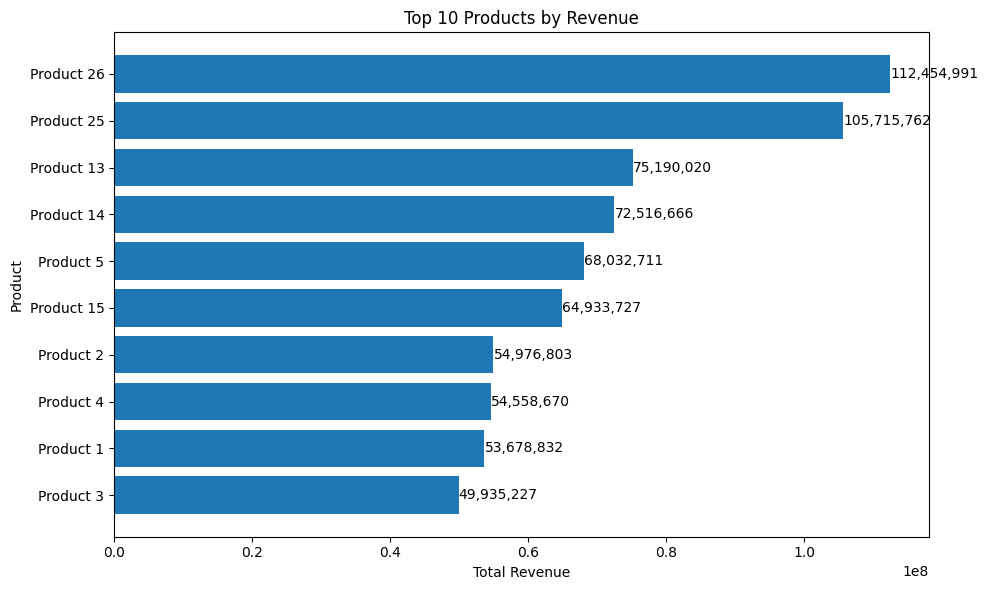

In [ ]:
#Top 10 product by revenue

top_products = (
    df
    .groupby('product_name', as_index=False)['revenue']
    .sum()
    .sort_values('revenue', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_products['product_name'], top_products['revenue'])
plt.gca().invert_yaxis()  # Highest revenue at the top

plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}',
        va='center'
    )

plt.tight_layout()
plt.show()

**INSIGHTS**
This one shows the strong revenue concentration within a small subset of products. This highlights their strategic importance but also a potential concentration risk. These top-performing products need to be protected.

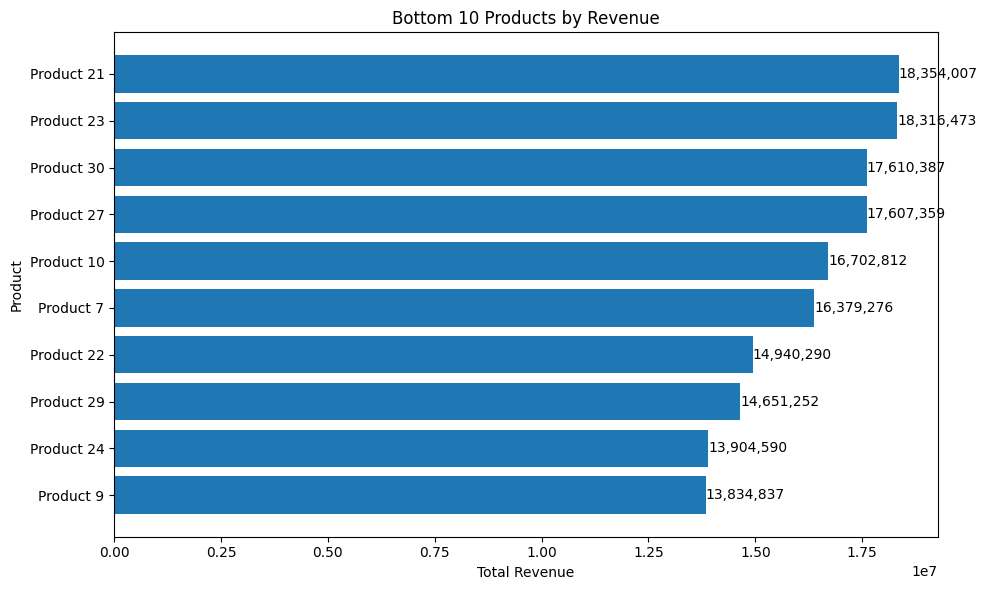

In [ ]:
#Bottom 10 products by revenue

bottom_products = (
    df
    .groupby('product_name', as_index=False)['revenue']
    .sum()
    .sort_values('revenue', ascending=True)
    .head(10)
)

plt.figure(figsize=(10, 6))
bars = plt.barh(bottom_products['product_name'], bottom_products['revenue'])

plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}',
        va='center'
    )

plt.tight_layout()
plt.show()

**INSIGHTS**
These products suggest limited demand or strategic misalignment while still incurring operational costs. There are opportunities for product rationalization, cost control or repositioning to improve overall portfolio efficiency.

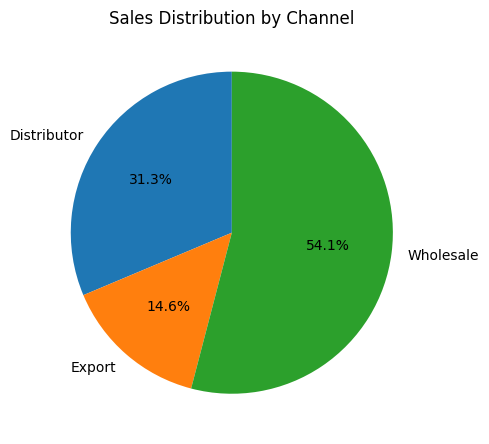

In [ ]:
#Sales by channel

channel_sales = (
    df
    .groupby('channel', as_index=False)['revenue']
    .sum()
)
plt.figure(figsize=(5, 5))
plt.pie(
    channel_sales['revenue'],
    labels=channel_sales['channel'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Sales Distribution by Channel')
plt.tight_layout()
plt.show()

**INSIGHTS**
There is a clear imbalance in revenue contribution with **Wholesale** accounting for the majority of sales. While these dominant channels are key revenue drivers, relying on them introduces concentration risk. **Distribution** and **Exporting **show untapped growth opportunities or require strategic optimization to improve their contribution.

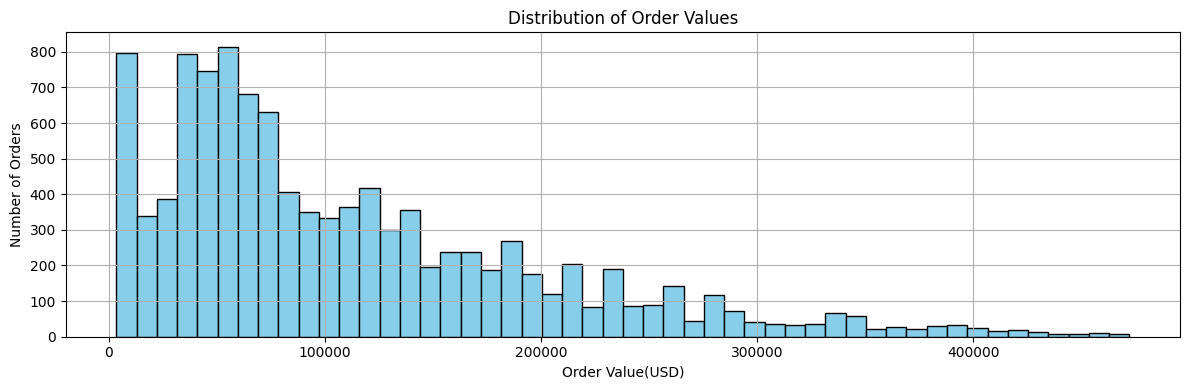

In [ ]:
#Average Order Value distribution

order_value_df = (
    df
    .groupby('order_number', as_index=False)['revenue']
    .sum()
    .rename(columns={'revenue': 'order_value'})
)

plt.figure(figsize=(12, 4))
plt.hist(order_value_df['order_value'], bins=50, color='skyblue', edgecolor='black')

plt.title('Distribution of Order Values')
plt.xlabel('Order Value(USD)')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.tight_layout()
plt.show()

**INSISGHTS**
There is a right skewed patern where most orders concentrated in the lower to mid-value range and a long tail of high value orders. While majority of transactions are relatively small, a limited number of large orders contribute disproportionately to total revenue.

/tmp/ipython-input-2741437866.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


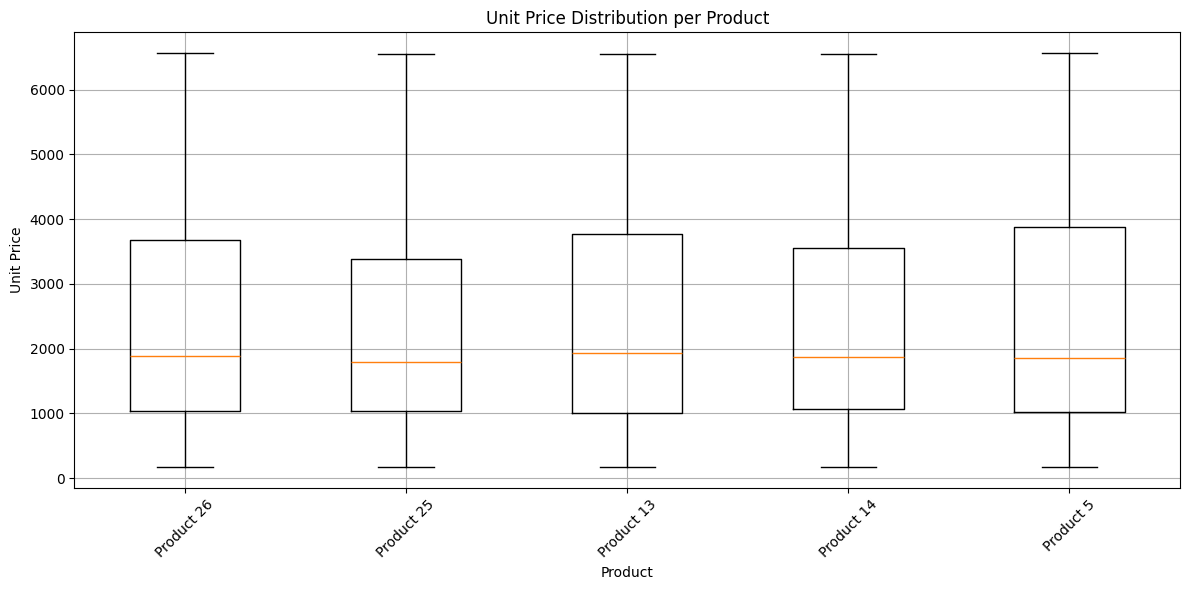

In [ ]:
#Unit Price Distribution per Product

price_data = df[df['product_name'].isin(top_products)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [price_data[price_data['product_name'] == p]['unit_price'] for p in top_products],
    labels=top_products
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


**INSIGHTS**
There is notable differences in pricing consistency and median price levels. While some products maintain stable pricing, others show significant variability and occasional outliers likely driven by discounts or contractual pricing. There is a diversified pricing strategy across the product portfolio and highlights opportunities for improved price governance and margin optimization.

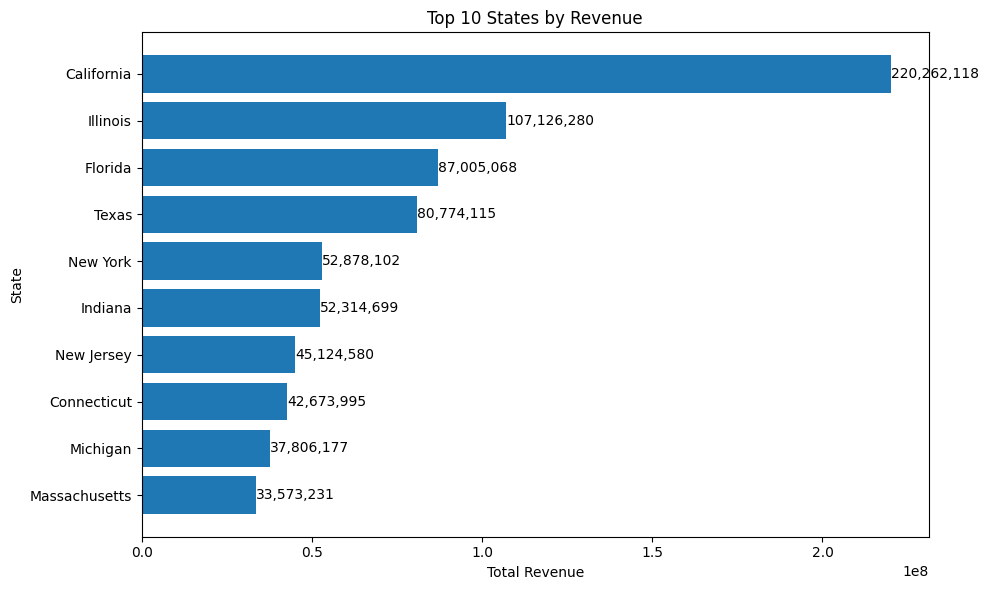

In [ ]:
#Top 10 States by Revenue
top_states_revenue = (
    df.groupby('state_name')
      .agg(
          total_revenue=('revenue', 'sum'),
          order_count=('order_number', 'nunique')
      )
      .sort_values('total_revenue', ascending=False)
      .head(10)
      .reset_index()
)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_states_revenue['state_name'], top_states_revenue['total_revenue'])
plt.gca().invert_yaxis()

plt.title('Top 10 States by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('State')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center')

plt.tight_layout()
plt.show()




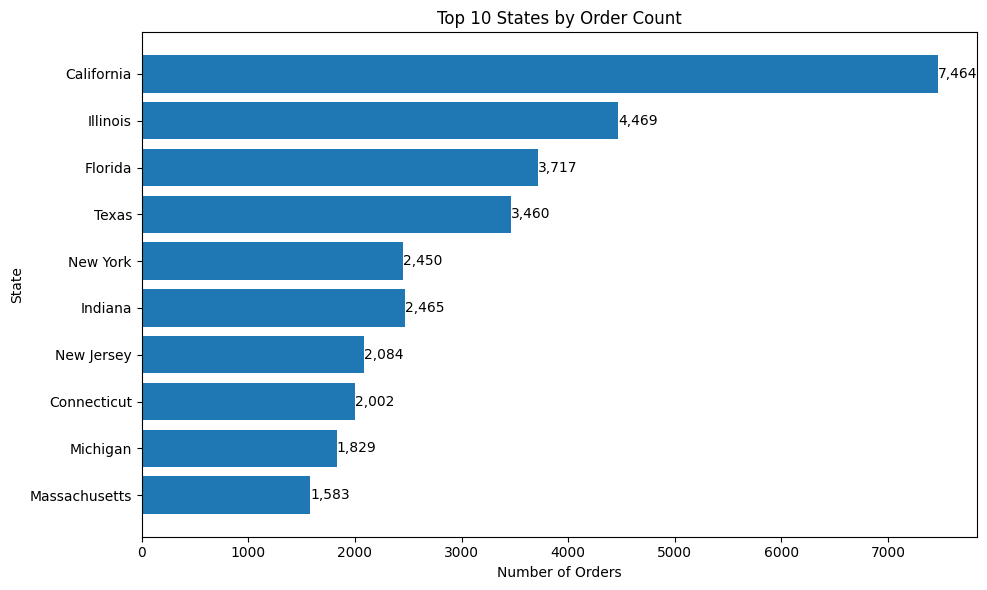

In [ ]:
#Top 10 States by Order Count

top_states_revenue = (
    df.groupby('state_name')
      .agg(
          total_revenue=('revenue', 'sum'),
          order_count=('order_number', 'nunique')
      )
      .sort_values('total_revenue', ascending=False)
      .head(10)
      .reset_index()
)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_states_revenue['state_name'], top_states_revenue['order_count'])
plt.gca().invert_yaxis()

plt.title('Top 10 States by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('State')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}', va='center')

plt.tight_layout()
plt.show()


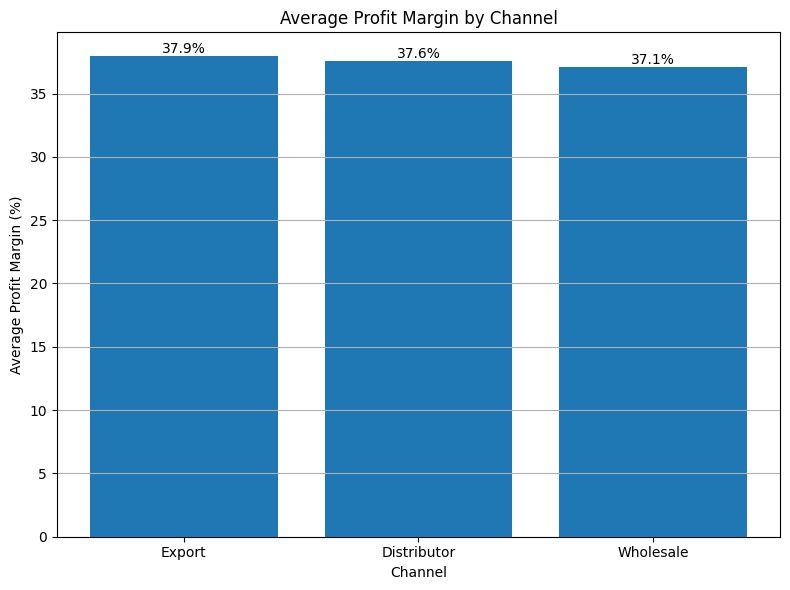

In [ ]:
#Average Profit Margin by Channel

#Calculate average profit margin per channel first
avg_profit_margin_channel = (
    df.groupby('channel', as_index=False)['profit_margin_pct']
      .mean()
      .sort_values('profit_margin_pct', ascending=False)
)
plt.figure(figsize=(8, 6))
bars = plt.bar(
    avg_profit_margin_channel['channel'],
    avg_profit_margin_channel['profit_margin_pct']
)

plt.title('Average Profit Margin by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.grid(axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()



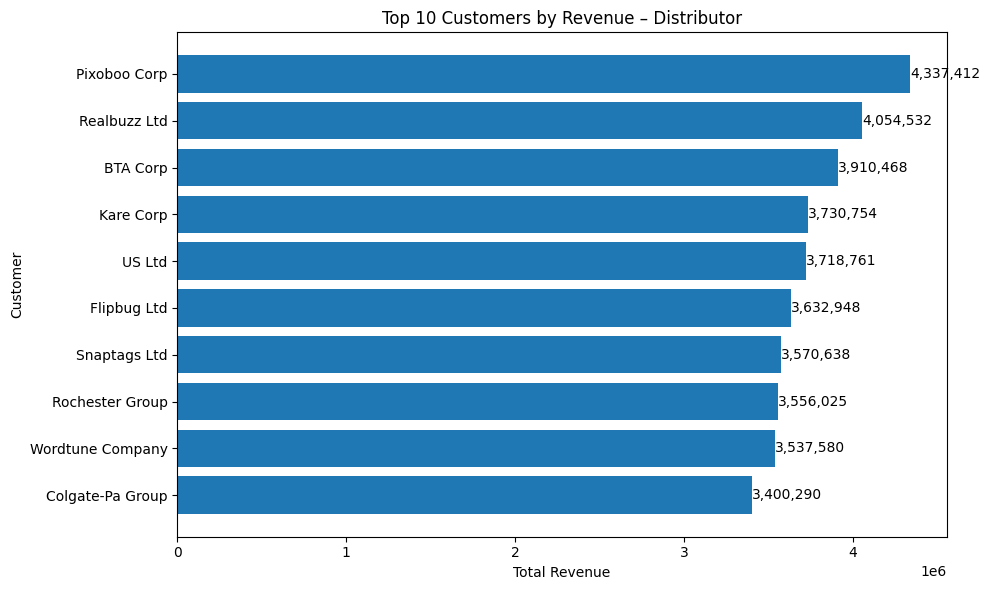

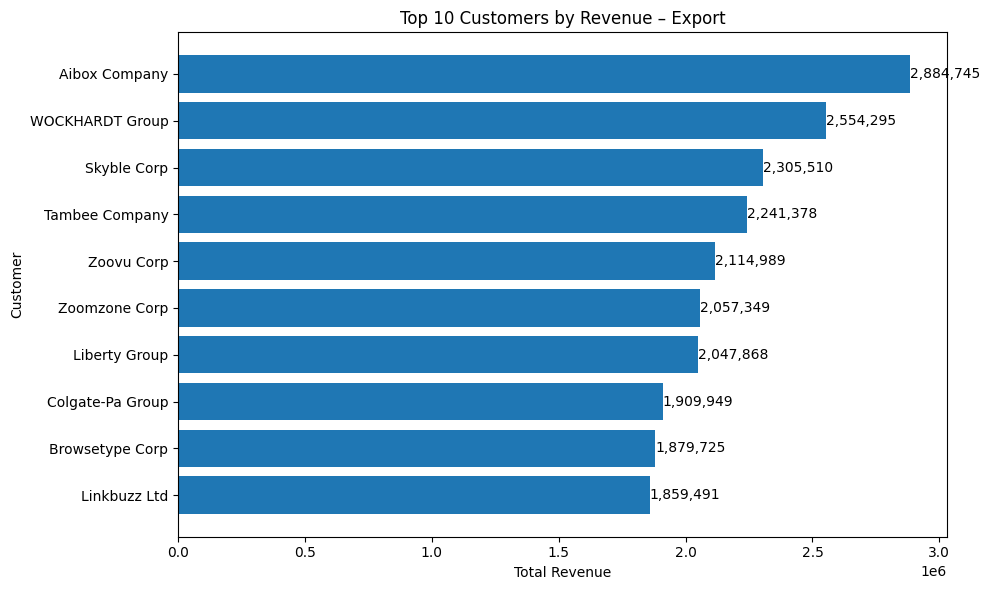

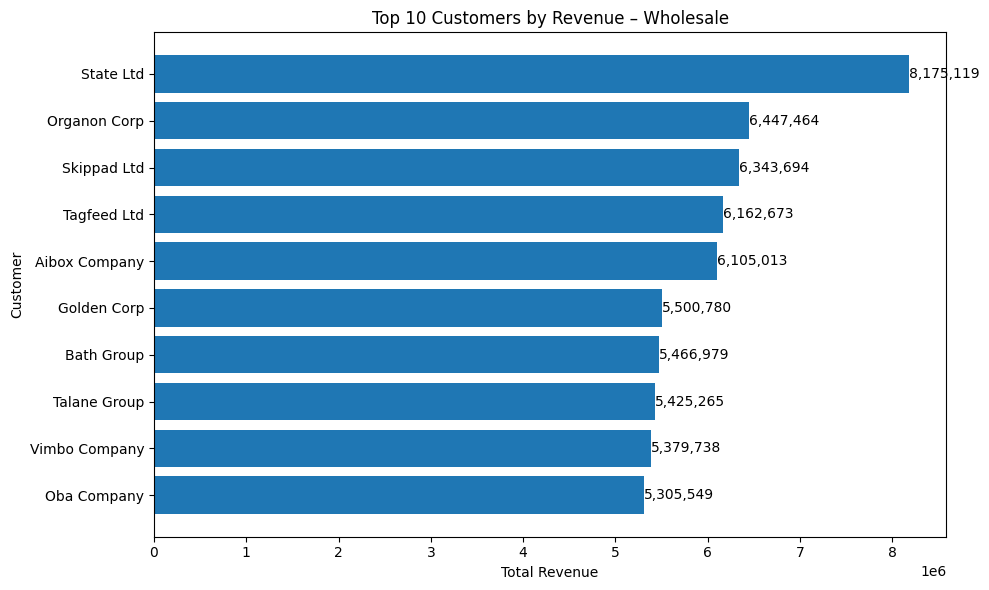

In [ ]:
#Top and Bottom 10 Customers by Channel
customer_channel_sales = (
    df.groupby(['channel', 'customer_name'], as_index=False)['revenue']
      .sum()
)
channels = customer_channel_sales['channel'].unique()

for ch in channels:
    top_customers = (
        customer_channel_sales[customer_channel_sales['channel'] == ch]
        .sort_values('revenue', ascending=False)
        .head(10)
    )

    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_customers['customer_name'], top_customers['revenue'])
    plt.gca().invert_yaxis()

    plt.title(f'Top 10 Customers by Revenue – {ch}')
    plt.xlabel('Total Revenue')
    plt.ylabel('Customer')

    # Value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center')

    plt.tight_layout()
    plt.show()

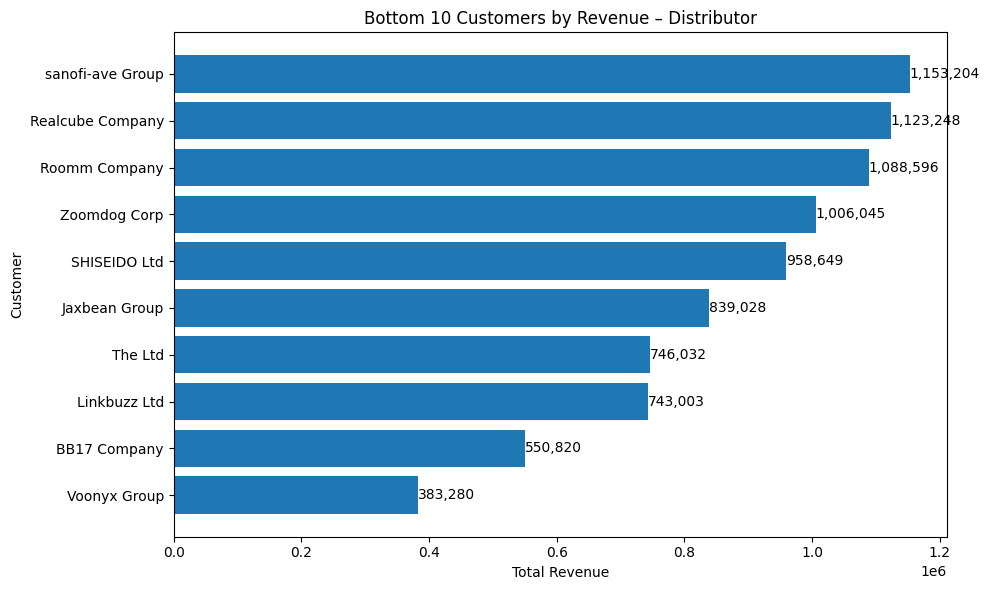

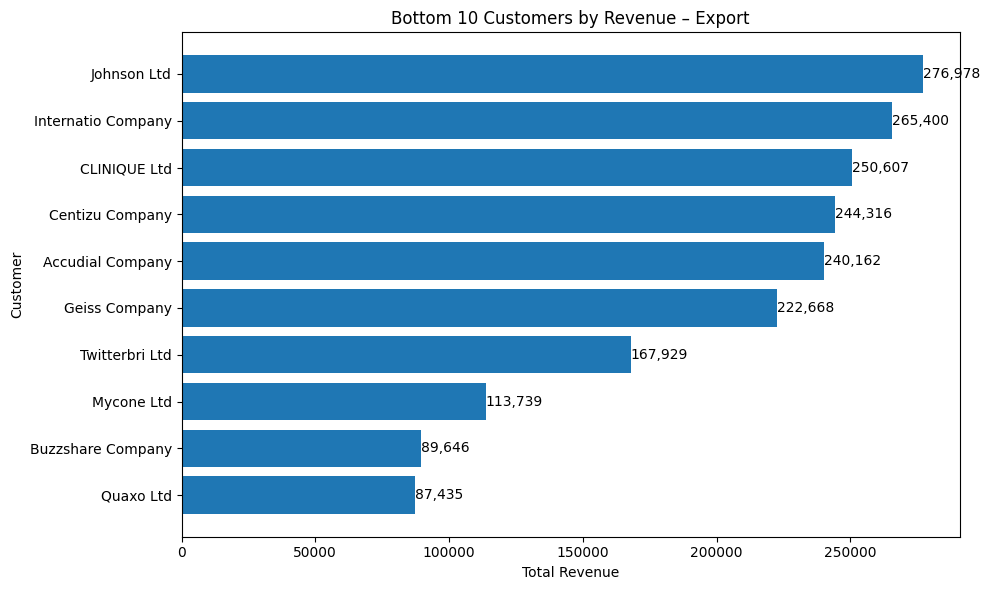

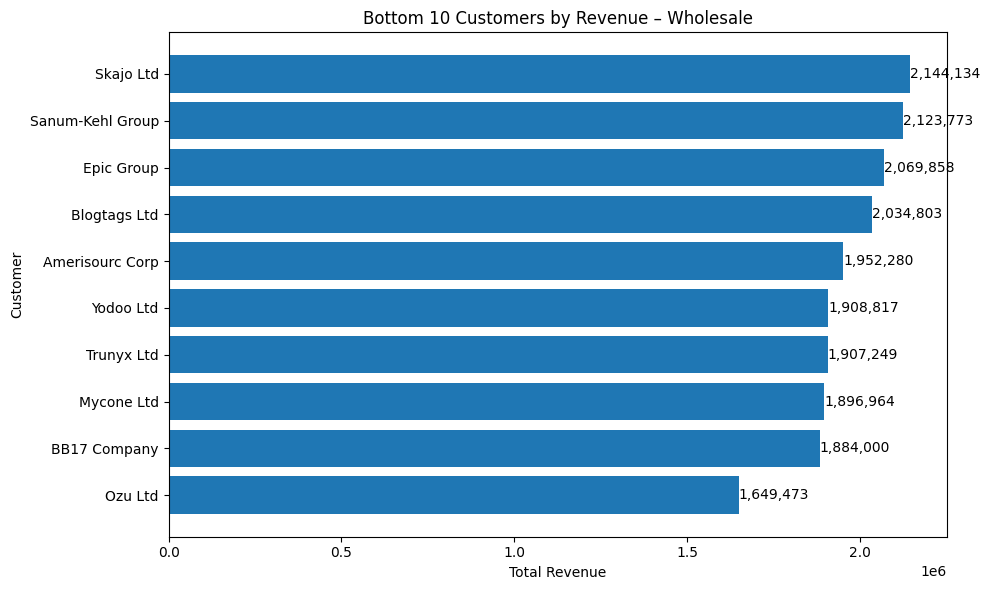

In [ ]:
customer_channel_sales = (
    df.groupby(['channel', 'customer_name'], as_index=False)['revenue']
      .sum()
)
for ch in channels:
    bottom_customers = (
        customer_channel_sales[customer_channel_sales['channel'] == ch]
        .sort_values('revenue', ascending=True)
        .head(10)
    )

    plt.figure(figsize=(10, 6))
    bars = plt.barh(bottom_customers['customer_name'], bottom_customers['revenue'])

    plt.title(f'Bottom 10 Customers by Revenue – {ch}')
    plt.xlabel('Total Revenue')
    plt.ylabel('Customer')

    # Value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center')

    plt.tight_layout()
    plt.show()


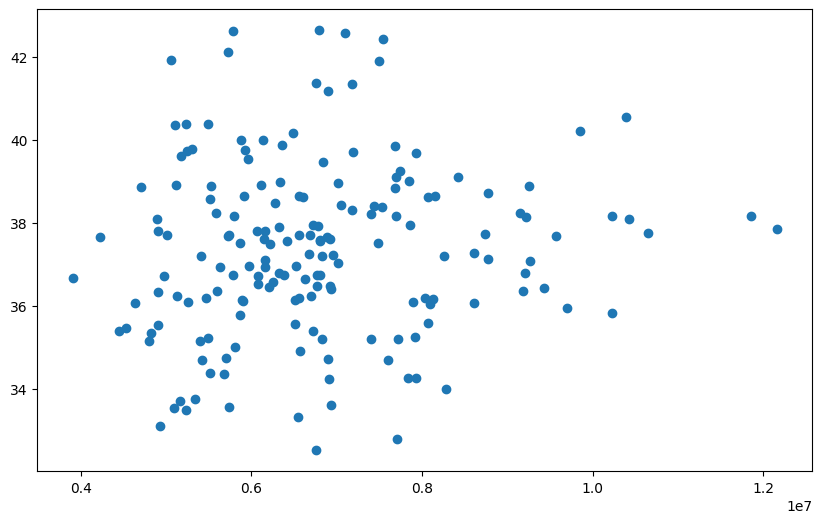

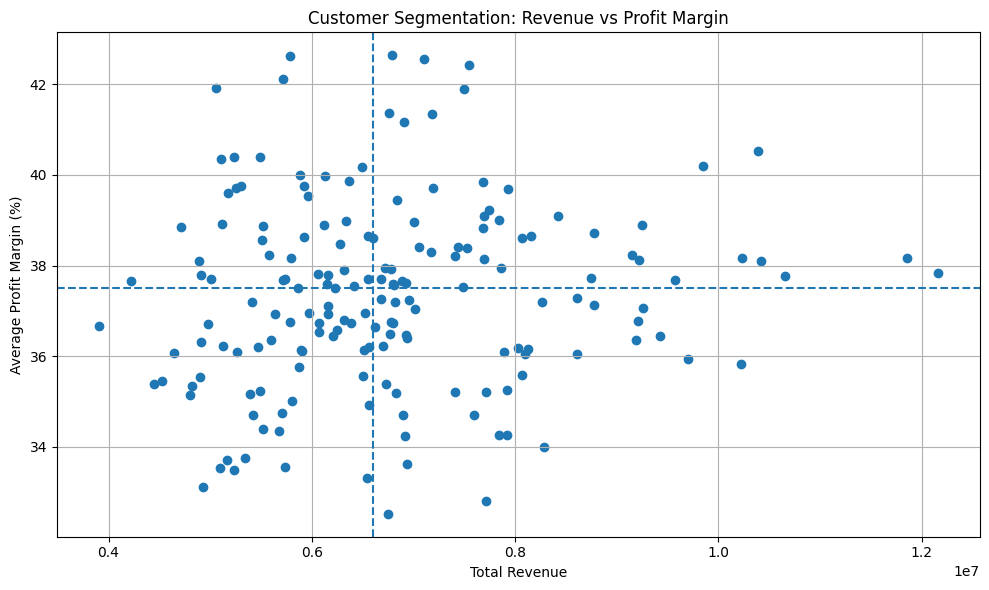

In [ ]:
customer_segmentation = (
    df.groupby('customer_name', as_index=False)
      .agg(
          total_revenue=('revenue', 'sum'),
          avg_profit_margin=('profit_margin_pct', 'mean')
      )
)
plt.figure(figsize=(10, 6))
plt.scatter(
    customer_segmentation['total_revenue'],
    customer_segmentation['avg_profit_margin']
)

#To help visually segment customers into quadrants
# Calculate medians
revenue_median = customer_segmentation['total_revenue'].median()
margin_median = customer_segmentation['avg_profit_margin'].median()

plt.figure(figsize=(10, 6))
plt.scatter(
    customer_segmentation['total_revenue'],
    customer_segmentation['avg_profit_margin']
)

plt.axvline(revenue_median, linestyle='--')
plt.axhline(margin_median, linestyle='--')

plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True)

plt.tight_layout()
plt.show()



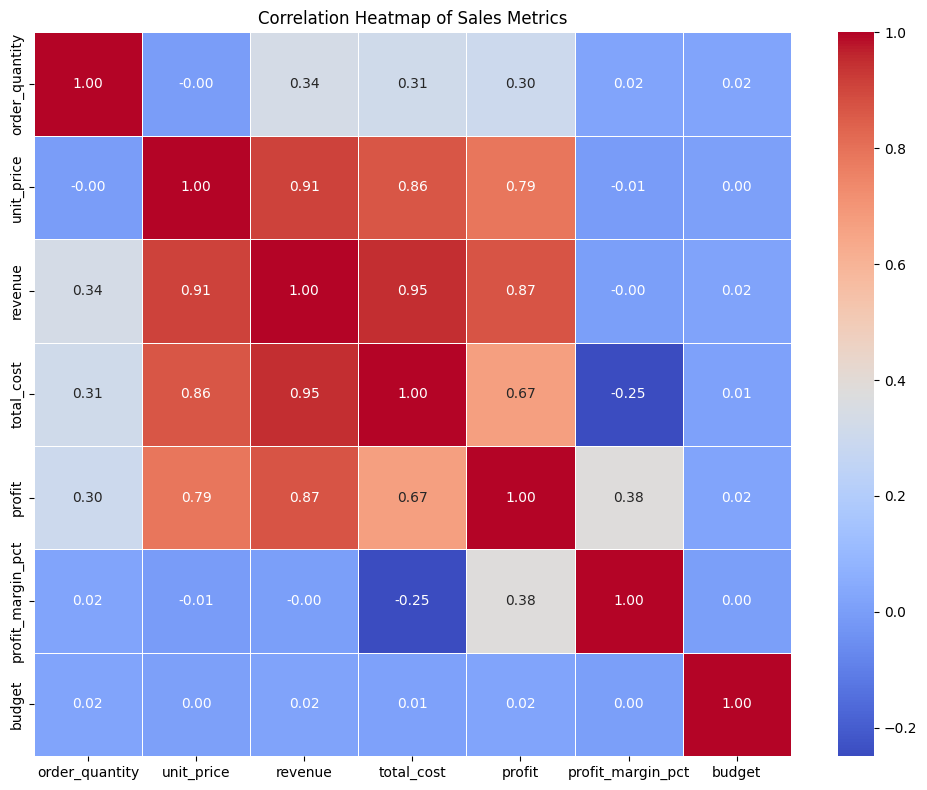

In [ ]:
#Correlation heatmap - happens for numeric heatmaps that make business sense
numeric_cols = [
    'order_quantity',
    'unit_price',
    'revenue',
    'total_cost',
    'profit',
    'profit_margin_pct',
    'budget'
]

corr_df = df[numeric_cols]

correlation_matrix = corr_df.corr()   #Compute correlation matrix


plt.figure(figsize=(10, 8))   #heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Sales Metrics')
plt.tight_layout()
plt.show()





**INSIGHTS**
Revenue and profit are more strongly driven by unit price than by order quantity, highlighting price as a key performance lever.
Revenue is tightly linked to total cost indicating proportional cost scaling as sales grow.
Profit margin exhibit weak relationships with revenue and pricing suggesting that high sales do not guarantee efficient profitability.
Budget figures show minimal correlation with actual performance pointing to potential gaps between planning and execution.
Cost-control strategies and feature selection are needed for predictive modelling.